NAME : VANSH KOLTE

ROLL_NO: 62

PRACTICAL :5 _ DL

In [2]:
import pandas as pd
df = pd.read_csv('/content/diabetes.csv')

# Print the DataFrame to verify the import
df.head(3)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

In [4]:
df.tail(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=96696172ab18acf5821100ff5a90c2fe90b2886aa99f34ba1bdd40b1abcf3642
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [6]:
from ydata_profiling import ProfileReport

In [8]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
missing_v = df.isnull().sum()
print(missing_v)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [12]:
Dul=df.duplicated().sum()
print(Dul)

0


In [14]:
# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [16]:
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
!pip install livelossplot

In [23]:
from livelossplot import PlotLossesKeras
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping

In [24]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [47]:
### 1. **Without Regularization**
model_no_reg = Sequential()
model_no_reg.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_no_reg.add(Dense(16, activation='relu'))
model_no_reg.add(Dense(1, activation='sigmoid'))
model_no_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



history_no_reg = model_no_reg.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.3, callbacks=[early_stopping], verbose=0,)
loss_no_reg, acc_no_reg = model_no_reg.evaluate(X_test, y_test)
print(f"Without Regularization - Loss: {loss_no_reg}, Accuracy: {acc_no_reg}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7554 - loss: 0.5344
Without Regularization - Loss: 0.5378163456916809, Accuracy: 0.7662337422370911


In [48]:
# Evaluate the model on the training data
loss_no_reg_train, acc_no_reg_train = model_no_reg.evaluate(X_train, y_train)
print(f"Without Regularization - Training Loss: {loss_no_reg_train}, Training Accuracy: {acc_no_reg_train}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.3732 
Without Regularization - Training Loss: 0.39519357681274414, Training Accuracy: 0.8110749125480652


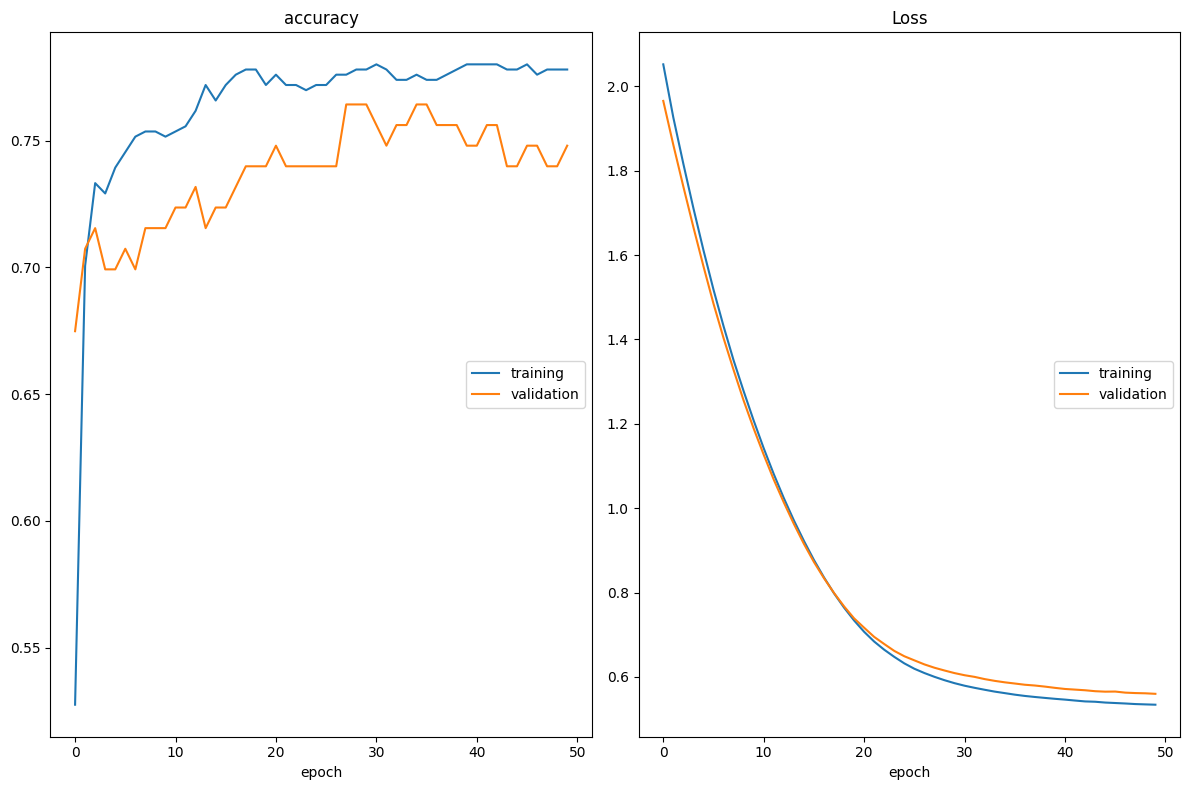

accuracy
	training         	 (min:    0.527, max:    0.780, cur:    0.778)
	validation       	 (min:    0.675, max:    0.764, cur:    0.748)
Loss
	training         	 (min:    0.534, max:    2.052, cur:    0.534)
	validation       	 (min:    0.560, max:    1.965, cur:    0.560)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7398 - loss: 0.5860 


In [56]:
from livelossplot import PlotLossesKerasTF
### 2. **L1 Regularization**
model_l1 = Sequential()
model_l1.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(0.01)))
model_l1.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model_l1.add(Dense(1, activation='sigmoid'))
model_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l1 = model_l1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[PlotLossesKerasTF()], verbose=0)
loss_l1, acc_l1 = model_l1.evaluate(X_test, y_test)


In [53]:
print(f"L1 Regularization - Loss: {loss_l1}, Accuracy: {acc_l1}")

L1 Regularization - Loss: 0.669448971748352, Accuracy: 0.7272727489471436


In [54]:
loss_l1, acc_l1 = model_l1.evaluate(X_train, y_train)
print(f"L1 Regularization - Training Loss: {loss_l1}, Training Accuracy: {acc_l1}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8482 - loss: 0.4083 
L1 Regularization - Training Loss: 0.4289261996746063, Training Accuracy: 0.8224755525588989


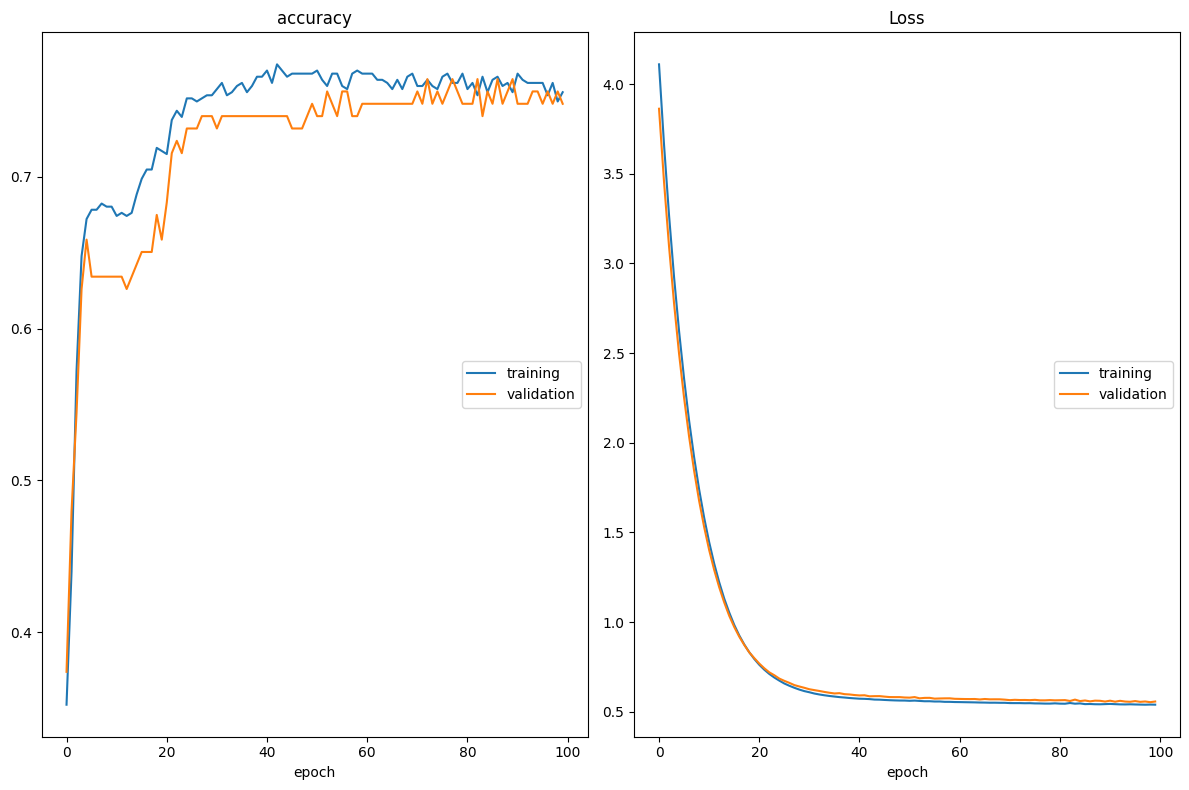

accuracy
	training         	 (min:    0.352, max:    0.774, cur:    0.756)
	validation       	 (min:    0.374, max:    0.764, cur:    0.748)
Loss
	training         	 (min:    0.539, max:    4.110, cur:    0.539)
	validation       	 (min:    0.553, max:    3.863, cur:    0.556)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7671 - loss: 0.5697 


In [44]:
### 3. **L2 Regularization**
model_l2 = Sequential()
model_l2.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.1)))
model_l2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.1)))
model_l2.add(Dense(1, activation='sigmoid'))
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[PlotLossesKerasTF()], verbose=0)
loss_l2, acc_l2 = model_l2.evaluate(X_test, y_test)

In [45]:
print(f"L2 Regularization - Loss: {loss_l2}, Accuracy: {acc_l2}")

L2 Regularization - Loss: 0.5614662170410156, Accuracy: 0.7857142686843872


In [58]:
loss_l2, acc_l2 = model_l2.evaluate(X_train, y_train)
print(f"L2 Regularization - Training Loss: {loss_l2}, Training Accuracy: {acc_l2}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7526 - loss: 0.5428 
L2 Regularization - Training Loss: 0.5404066443443298, Training Accuracy: 0.7589576840400696


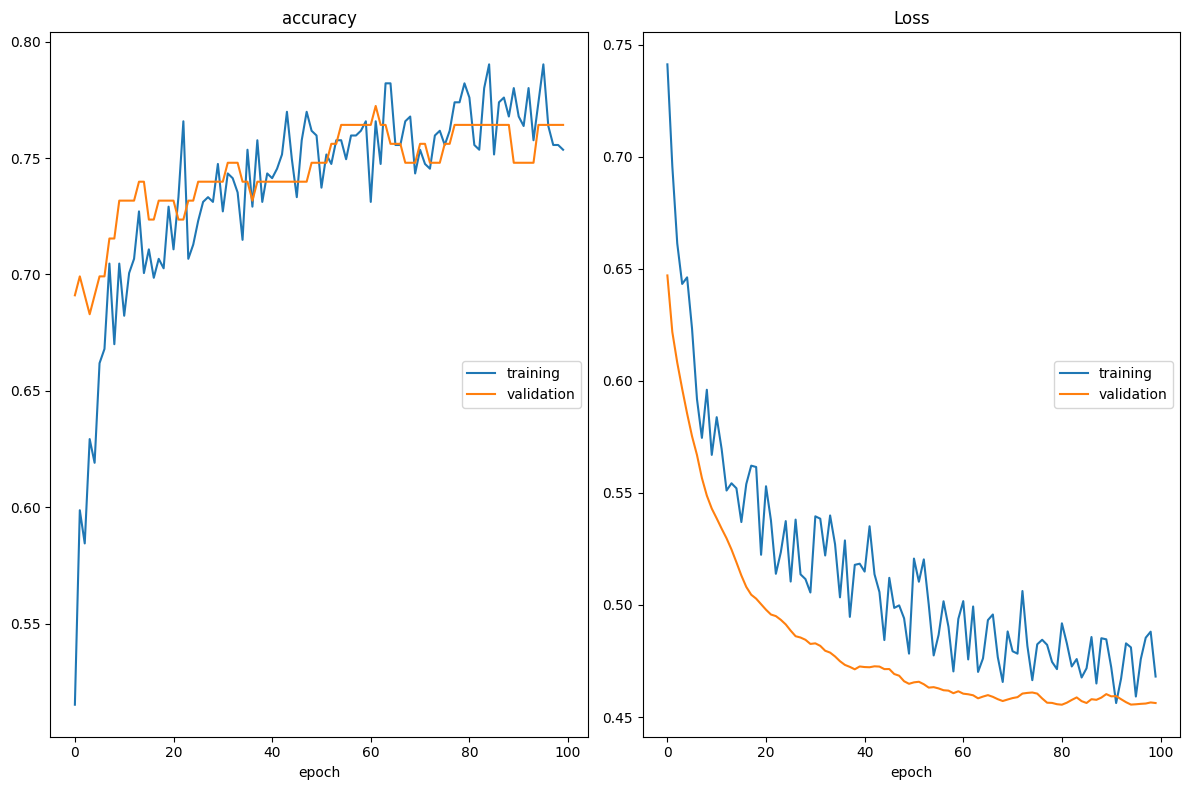

accuracy
	training         	 (min:    0.515, max:    0.790, cur:    0.754)
	validation       	 (min:    0.683, max:    0.772, cur:    0.764)
Loss
	training         	 (min:    0.456, max:    0.741, cur:    0.468)
	validation       	 (min:    0.455, max:    0.647, cur:    0.456)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7732 - loss: 0.5214 


In [59]:
### 4. **Dropout Regularization**
model_dropout = Sequential()
model_dropout.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(16, activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(1, activation='sigmoid'))
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[PlotLossesKerasTF()], verbose=0)
loss_dropout, acc_dropout = model_dropout.evaluate(X_test, y_test)

In [60]:
loss_dropout, acc_dropout = model_dropout.evaluate(X_train, y_train)
print(f"Dropout Regularization - Training Loss: {loss_dropout}, Training Accuracy: {acc_dropout}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7837 - loss: 0.4327 
Dropout Regularization - Training Loss: 0.433943510055542, Training Accuracy: 0.7801302671432495


In [65]:
from keras.regularizers import l1_l2

from keras.callbacks import EarlyStopping

# Combination all four regularization
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)))
model.add(Dropout(0.3))  # Dropout to reduce overfitting
model.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                     callbacks=[early_stopping], verbose=1)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6783 - loss: 0.7722 - val_accuracy: 0.6179 - val_loss: 0.7978
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6496 - loss: 0.7268 - val_accuracy: 0.6341 - val_loss: 0.7610
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6718 - loss: 0.6875 - val_accuracy: 0.6260 - val_loss: 0.7325
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6853 - loss: 0.7180 - val_accuracy: 0.6667 - val_loss: 0.7113
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7052 - loss: 0.6662 - val_accuracy: 0.6992 - val_loss: 0.6933
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7191 - loss: 0.6632 - val_accuracy: 0.7073 - val_loss: 0.6764
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6911 - loss: 0.6598 - val_accuracy: 0.7236 - val_loss: 0.6654
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6845 - loss: 0.6801 - val_accuracy: 0.

In [66]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7177 - loss: 0.5872

Test Loss: 0.5941, Test Accuracy: 74.03%


In [67]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"\nTraining Loss: {loss:.4f}, Training Accuracy: {accuracy*100:.2f}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7944 - loss: 0.4643

Training Loss: 0.4758, Training Accuracy: 78.50%
